In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# 1. Wczytanie danych

In [2]:
X = pd.read_csv("../transformed_data/X_train.csv")
y = pd.read_csv("../transformed_data/y_train.csv")

In [3]:
X.head()

,Oxygen [Partial pressure] in Arterial blood,Total Bilirubin (Elevated),Lymphocytes/100 leukocytes in Blood by Automated count,C reactive protein [Mass/volume] in Serum or Plasma,Basophils [#/volume] in Blood by Automated count,Prothrombin time (PT),Platelet Count,Lymphocytes [#/volume] in Blood by Automated count,Carbon dioxide [Partial pressure] in Arterial blood,Eosinophils/100 leukocytes in Blood by Automated count,...,Ketones [Presence] in Urine by Test strip_2+,Stage group.clinical Cancer_earlystage,Stage group.clinical Cancer_latestage,Smokes tobacco daily_True,SARS-CoV-2 RNA Pnl Resp NAA+probe_False,SARS-CoV-2 RNA Pnl Resp NAA+probe_True,Influenza virus A Ag [Presence] in Nasopharynx by Rapid immunoassay_False,Influenza virus A Ag [Presence] in Nasopharynx by Rapid immunoassay_True,Influenza virus B Ag [Presence] in Nasopharynx by Rapid immunoassay_False,Influenza virus B Ag [Presence] in Nasopharynx by Rapid immunoassay_True
0,48.94,1.9,15.19,10.11,0.3,11.625,304.1,1.0,40.11,4.5,...,0,0,0,0,0,0,0,0,0,0
1,48.94,1.9,15.19,10.11,0.3,11.625,304.1,1.0,40.11,4.5,...,0,0,0,0,0,0,0,0,0,0
2,48.94,1.9,15.19,10.11,0.3,11.625,304.1,1.0,40.11,4.5,...,0,0,0,0,0,0,0,0,0,0
3,48.94,1.9,15.19,10.11,0.3,11.625,304.1,1.0,40.11,4.5,...,0,0,0,0,0,0,0,0,0,0
4,48.94,1.9,15.19,10.11,0.3,11.625,304.1,1.0,40.11,4.5,...,0,0,0,0,0,0,0,0,0,0


### MLP

1. Warstwa gęsta: Pierwsza warstwa gęsta ma 128 neuronów. Parametr input_dim określa liczbę cech danych wejściowych. Aktywacja funkcji ReLU jest używana do wprowadzenia nieliniowości.

2. Warstwa dropout: Po warstwie gęstej dodana jest warstwa dropout z wartością 0.5, co oznacza, że 50% neuronów zostanie losowo wyłączonych podczas treningu. To pomaga w zapobieganiu nadmiernemu dopasowaniu modelu.

3. Kolejne warstwy gęste i dropout: Dodane są kolejne dwie warstwy gęste, z liczbą neuronów odpowiednio 64 i 32. Po każdej z tych warstw dodana jest warstwa dropout z wartością 0.5.

4. Warstwa wyjściowa: Ostatnia warstwa gęsta ma 1 neuron z aktywacją sigmoidalną, co umożliwia modelowi dokonywanie binarnej klasyfikacji, zwracając prawdopodobieństwo przynależności do klasy pozytywnej.

5. Kompilacja modelu: Model jest kompilowany z optymalizatorem Adam i funkcją straty binary_crossentropy, ponieważ model przewiduje binarną klasę wyjściową. Jako metrykę wykorzystuje się odzysk, aby monitorować jakość modelu pod kątem zdolności do wykrywania klasy pozytywnej.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
model = Sequential()

# Dodanie pierwszej warstwy ukrytej
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

# Dodanie kolejnych warstw ukrytych
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Dodanie ostatniej warstwy ukrytej
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Warstwa wyjściowa
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

In [7]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)


Epoch 1/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.9980 - recall: 0.3272 - val_loss: 0.5467 - val_recall: 0.0213
Epoch 2/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.8064 - recall: 0.3400 - val_loss: 0.4499 - val_recall: 0.5061
Epoch 3/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.4270 - recall: 0.4871 - val_loss: 0.1590 - val_recall: 0.8476
Epoch 4/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.3037 - recall: 0.6757 - val_loss: 0.1383 - val_recall: 0.8262
Epoch 5/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.2561 - recall: 0.7386 - val_loss: 0.1382 - val_recall: 0.8232
Epoch 6/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.1925 - recall: 0.8162 - val_loss: 0.1085 - val_recall: 0.8994
Epoch 7/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.1844 - recall: 0.8105 - val_loss: 0.1019 - val_recall: 0.9299
Epoch 8/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.1803 - recall: 0.8398 - val_loss: 0.1136 - val_r

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.0798 - recall: 0.9097 - val_loss: 0.0656 - val_recall: 0.8811
Epoch 52/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.0817 - recall: 0.8758 - val_loss: 0.0687 - val_recall: 0.8750
Epoch 53/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.0924 - recall: 0.8739 - val_loss: 0.0629 - val_recall: 0.9543
Epoch 54/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0955 - recall: 0.8808 - val_loss: 0.0569 - val_recall: 0.9268
Epoch 55/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.0831 - recall: 0.8746 - val_loss: 0.0690 - val_recall: 0.8963
Epoch 56/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.0903 - recall: 0.8777 - val_loss: 0.0676 - val_recall: 0.9360
Epoch 57/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.0823 - recall: 0.8902 - val_loss: 0.0657 - val_recall: 0.9116
Epoch 58/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0837 - recall: 0.8942 - val_loss: 0.0564 - val_reca

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.0656 - recall: 0.9288 - val_loss: 0.0570 - val_recall: 0.9390
Epoch 102/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0820 - recall: 0.8863 - val_loss: 0.0519 - val_recall: 0.9543
Epoch 103/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0690 - recall: 0.9241 - val_loss: 0.0566 - val_recall: 0.9329
Epoch 104/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0670 - recall: 0.9054 - val_loss: 0.0563 - val_recall: 0.9573
Epoch 105/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.0710 - recall: 0.9254 - val_loss: 0.0524 - val_recall: 0.9451
Epoch 106/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0682 - recall: 0.9020 - val_loss: 0.0586 - val_recall: 0.9390
Epoch 107/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.0626 - recall: 0.9052 - val_loss: 0.0575 - val_recall: 0.9390
Epoch 108/150
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0696 - recall: 0.9244 - val_loss: 0.0636 - v

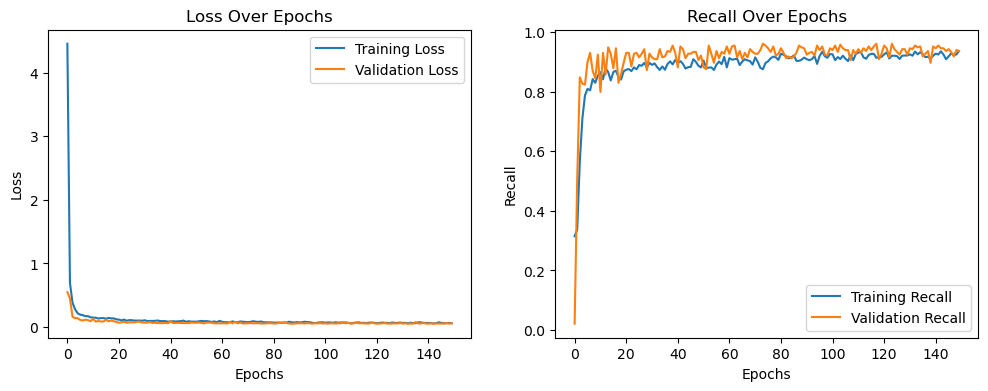

In [8]:
# Wyciąganie danych z historii treningu
loss = history.history['loss']
val_loss = history.history['val_loss']
recall = history.history['recall']
val_recall = history.history['val_recall']

# Tworzenie wykresu strat
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Tworzenie wykresu metryki recall
plt.subplot(1, 2, 2)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.show()

In [9]:
loss1, recall1 = model.evaluate(X_test, y_test)
print(f'Test recall: {recall1 * 100:.2f}%')

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.0343 - recall: 0.9618
Test recall: 95.61%


In [10]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


### LSTM

1. Warstwa LSTM: Pierwsza warstwa LSTM ma 128 neuronów. Parametr input_shape definiuje kształt danych wejściowych dla modelu LSTM, który odpowiada wymiarom danych wejściowych (liczba próbek, liczba kroków czasowych, liczba cech). W tym przypadku, X_train_seq.shape[1] odpowiada liczbie kroków czasowych, a X_train_seq.shape[2] odpowiada liczbie cech. Aktywacja funkcji ReLU jest używana do wprowadzenia nieliniowości, a return_sequences=True oznacza, że warstwa LSTM zwraca sekwencję wartości, co jest wymagane, gdy kolejna warstwa LSTM ma być dodana.

2. Kolejna warstwa LSTM: Druga warstwa LSTM ma 64 neurony. Ponownie, aktywacja funkcji ReLU jest stosowana do wprowadzenia nieliniowości. W tej warstwie nie ma ustawienia return_sequences, co oznacza, że warstwa LSTM zwraca tylko ostatni stan ukryty.

3. Warstwa wyjściowa: Warstwa gęsta z jednym neuronem i aktywacją sigmoidalną jest dodawana jako warstwa wyjściowa. Aktywacja sigmoidalna przewiduje prawdopodobieństwo przynależności do klasy pozytywnej.

4. Kompilacja modelu: Model jest kompilowany z optymalizatorem Adam i funkcją straty binary_crossentropy, ponieważ model przewiduje binarną klasę wyjściową. Jako metrykę wykorzystuje się odzysk, aby monitorować jakość modelu pod kątem zdolności do wykrywania klasy pozytywnej.

5. Trening modelu z wczesnym zatrzymaniem: Zastosowano technikę wczesnego zatrzymania, aby przerwać trening, jeśli wartość straty walidacji przestanie się poprawiać przez określoną liczbę epok. Opcja restore_best_weights przywraca najlepsze wagi modelu, które osiągnięto podczas treningu.

In [11]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
timesteps = 1

X_train_seq = np.reshape(X_train, (X_train.shape[0], timesteps, X_train.shape[1]))
X_test_seq = np.reshape(X_test, (X_test.shape[0], timesteps, X_test.shape[1]))


In [13]:
model1 = Sequential()
# Warstwa LSTM
model1.add(LSTM(128, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), activation='relu', return_sequences=True))
model1.add(Dropout(0.5))

# Kolejna warstwa LSTM
model1.add(LSTM(64, activation='relu'))
model1.add(Dropout(0.5))

# Warstwa wyjściowa
model1.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

# Trening modelu z wczesnym zatrzymaniem
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history1 = model1.fit(X_train_seq, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7878 - recall: 0.4121 - val_loss: 0.1285 - val_recall: 0.8628
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1888 - recall: 0.8334 - val_loss: 0.1064 - val_recall: 0.8506
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1572 - recall: 0.8233 - val_loss: 0.1125 - val_recall: 0.8476
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1320 - recall: 0.8806 - val_loss: 0.0915 - val_recall: 0.9451
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245 - recall: 0.8882 - val_loss: 0.1028 - val_recall: 0.8902
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1413 - recall: 0.8497 - val_loss: 0.1105 - val_recall: 0.9085
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1493 - recall: 0.8524 - val_loss: 0.1085 - val_recall: 0.8445
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1360 - recall: 0.8580 - val_loss: 0.0899 - val_recall: 0.8902


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0735 - recall: 0.9447 - val_loss: 0.0546 - val_recall: 0.9512
Epoch 53/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0761 - recall: 0.9486 - val_loss: 0.0639 - val_recall: 0.9207
Epoch 54/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0799 - recall: 0.9351 - val_loss: 0.0654 - val_recall: 0.9390
Epoch 55/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0849 - recall: 0.9521 - val_loss: 0.0568 - val_recall: 0.9299
Epoch 56/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0849 - recall: 0.9353 - val_loss: 0.0646 - val_recall: 0.9177


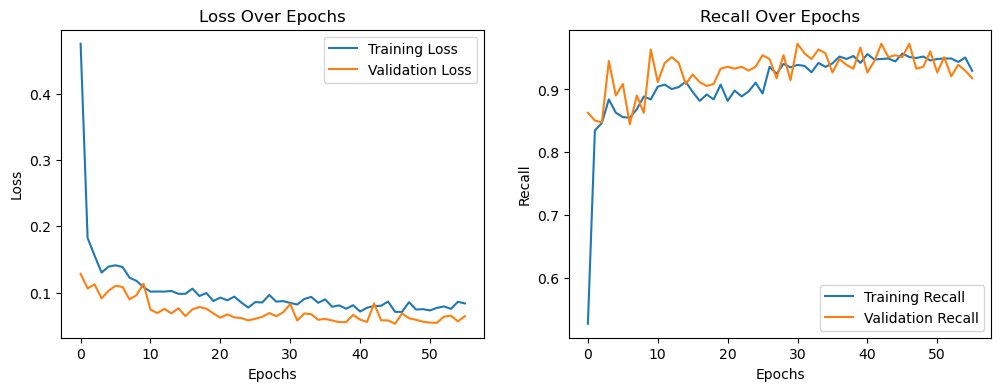

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.0356 - recall: 0.9725
Test recall: 96.49%


In [14]:
# Wyciąganie danych z historii treningu
loss = history1.history['loss']
val_loss = history1.history['val_loss']
recall = history1.history['recall']
val_recall = history1.history['val_recall']

# Tworzenie wykresu strat
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Tworzenie wykresu metryki recall
plt.subplot(1, 2, 2)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.show()

# Ocena modelu na zbiorze testowym
loss2, recall2 = model1.evaluate(X_test_seq, y_test)
print(f'Test recall: {recall2 * 100:.2f}%')

### CNN

1. Warstwa splotowa 1D: Pierwsza warstwa splotowa ma 32 filtry o rozmiarze 3. Aktywacja funkcji ReLU jest używana do wprowadzenia nieliniowości. Wejściowa kształt danych to (ilość próbek, ilość cech, 1), gdzie ostatnia wartość 1 oznacza, że dane są traktowane jako dane jednowymiarowe.

2. Warstwa poolingowa: Warstwa poolingowa MaxPooling1D z rozmiarem okna 2 jest stosowana do redukcji wymiarowości danych wyjściowych z warstwy splotowej.

3. Warstwa spłaszczająca: Warstwa Flatten jest używana do przekształcenia danych z formatu trójwymiarowego do formatu jednowymiarowego, aby móc podłączyć je do warstw gęstych.

4. Warstwy gęste: Następnie następuje dwukrotna warstwa gęsta. Pierwsza warstwa gęsta ma 64 neurony z aktywacją ReLU i 50% warstwą Dropout, która pomaga w zapobieganiu nadmiernemu dopasowaniu modelu. Warstwa wyjściowa ma 1 neuron z aktywacją sigmoidalną, która przewiduje prawdopodobieństwo przynależności do klasy pozytywnej.

5. Kompilacja modelu: Model jest kompilowany z optymalizatorem Adam i funkcją straty binary_crossentropy, ponieważ model przewiduje binarną klasę wyjściową. Jako metrykę wykorzystuje się odzysk, aby monitorować jakość modelu pod kątem zdolności do wykrywania klasy pozytywnej.

6. Wczesne zatrzymanie: Zastosowano technikę wczesnego zatrzymywania, aby przerwać trening, jeśli wartość straty walidacji przestanie się poprawiać przez określoną liczbę epok. Opcja restore_best_weights przywraca najlepsze wagi modelu, które osiągnięto podczas treningu.

In [15]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
X_train_array = X_train.values
X_test_array = X_test.values

X_train_reshaped = X_train_array[..., np.newaxis]
X_test_reshaped = X_test_array[..., np.newaxis]

# Budowa modelu CNN
model2 = Sequential()

# Warstwa splotowa 1D
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
# Warstwa poolingowa do redukcji wymiarowości
model2.add(MaxPooling1D(pool_size=2))
# Warstwa spłaszczająca dane
model2.add(Flatten())
# Warstwy gęste
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))  # Warstwa wyjściowa

# Kompilacja modelu
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

# Wczesne zatrzymywanie w przypadku braku poprawy
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Trening modelu
history2 = model2.fit(X_train_reshaped, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7695 - recall: 0.5105 - val_loss: 0.1259 - val_recall: 0.8994
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1988 - recall: 0.7974 - val_loss: 0.1146 - val_recall: 0.9085
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1635 - recall: 0.8260 - val_loss: 0.1139 - val_recall: 0.8567
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1512 - recall: 0.8102 - val_loss: 0.0915 - val_recall: 0.9207
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1721 - recall: 0.7807 - val_loss: 0.0985 - val_recall: 0.8902
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1540 - recall: 0.7809 - val_loss: 0.0823 - val_recall: 0.9268
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1459 - recall: 0.8011 - val_loss: 0.1371 - val_recall: 0.7835
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1556 - recall: 0.7614 - val_loss: 0.0865 - val_recall: 0.9421


In [ ]:
# Wyciąganie danych z historii treningu
loss = history2.history['loss']
val_loss = history2.history['val_loss']
recall = history2.history['recall']
val_recall = history2.history['val_recall']

# Tworzenie wykresu strat
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Tworzenie wykresu metryki recall
plt.subplot(1, 2, 2)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall Over Epochs')
plt.legend()

plt.show()

In [ ]:
loss3, recall3 = model2.evaluate(X_test_reshaped, y_test)
print(f'Test recall: {recall3 * 100:.2f}%')

### Skuteczność modeli

In [ ]:

models = ['MLP', 'LSTM', 'CNN']
losses = [loss1, loss2, loss3]  
recalls = [recall1, recall2, recall3]  


results_df = pd.DataFrame({'Model': models, 'Loss': losses, 'Recall': recalls})


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Loss', data=results_df, palette='viridis')
plt.title('Loss for Different Models')
plt.xlabel('Model')
plt.ylabel('Loss')
for index, value in enumerate(losses):
    plt.text(index, value, f'{value:.5f}', ha='center', va='bottom')


plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='Recall', data=results_df, palette='viridis')
plt.title('Recall for Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
for index, value in enumerate(recalls):
    plt.text(index, value, f'{value:.3f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Lista nazw modeli
model_names = ['MLP', 'LSTM', 'CNN']

# Lista modeli
models = [model, model1, model2]
tests = [X_test, X_test_seq, X_test_reshaped]

plt.figure(figsize=(10, 6))

# Iteracja po modelach
for name, mdl, test in zip(model_names, models, tests):
    # Wygenerowanie predykcji dla zbioru testowego
    y_pred = mdl.predict(test)
    
    # Obliczenie punktów ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Wykres krzywej ROC
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Wykres krzywej ROC dla losowego klasyfikatora
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Classifier')

# Dopełnienie wykresu
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Wnioski
- z użytych tutaj sieci neuronowych najlepsze wyniki CNN - najwyższy recall: 97,7% i najniższy loss: 0,0362. 
- wszytkie modele osiągnęły taki sam wynik na krzywej ROC
- model CNN można użyć jako ostateczny - do wyboru